## **Neural Network Regression in TensorFlow**

👁️👁️ Looking to solve Regression Problems

 - Architecture of a neural network regression model
 - Input shapes and output shapes of a regression model (**features** and labels)
 - Creating custom data to view and fit
 - Steps in modelling
  - Creating a model, compiling a model, fitting a model, evaluating a model.
 - Different evaluation methods
 - Saving and loading models

In [1]:
# Import Tensorflow
import tensorflow as tf
print(tf.__version__)

2.12.0


### Creating data to view and fit

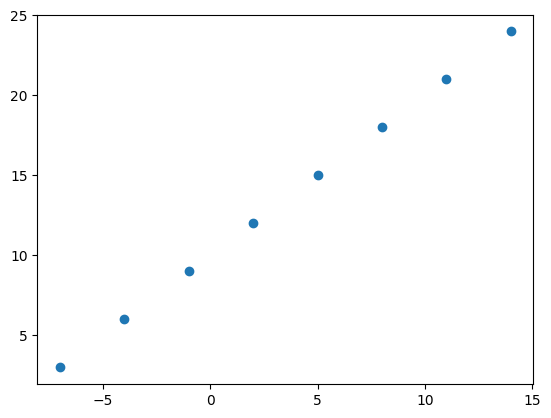

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y)


In [3]:
# This is how we get y values from this values (the linear regression of this very simple model)
X + 10

array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])

In [4]:
y == X + 10


array([ True,  True,  True,  True,  True,  True,  True,  True])

#### Input and Output Shapes

In [5]:
# Create a demo tenosr for our housing price prediction problem
house_info = tf.constant(['bedroom','bathroom','garage'])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [6]:
X[0], y[0]

(-7.0, 3.0)

In [7]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [8]:
# Turn our NumPy arrays into tensors
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)

X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [9]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

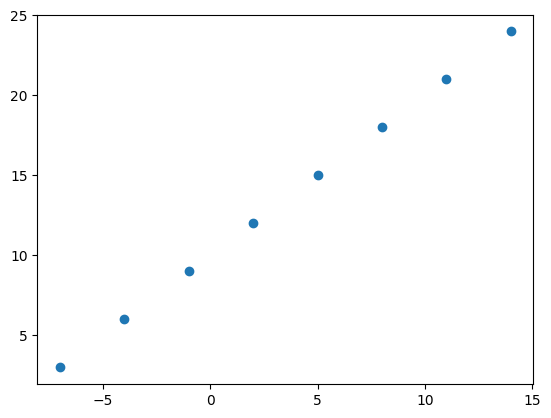

In [10]:
plt.scatter(X, y)


### Steps in modelling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function (in other words, the function which tells our model how worng it is), the optimizer (tells our model how to improve the patterns its learning), and the evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X & y (features & labels). Epochs - How many times the model will go through all of the training examples
4. **Evaluate the model** on the test data (how reliable are our models predictions?)


In [11]:
# Set random seed
tf.random.set_seed(42)

# 1. Create amodel using the sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
]) # into a list method

# add method
# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Dense(1))

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, #mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), #SGD is short for Stochastic Gradient Descent
              metrics=['mae'])

# Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 1s/step - loss: 16.2735 - mae: 16.2735
Epoch 2/5
1/1 [==============================] - 0s 26ms/step - loss: 15.9923 - mae: 15.9923
Epoch 3/5
1/1 [==============================] - 0s 19ms/step - loss: 15.7110 - mae: 15.7110
Epoch 4/5
1/1 [==============================] - 0s 22ms/step - loss: 15.4298 - mae: 15.4298
Epoch 5/5
1/1 [==============================] - 0s 19ms/step - loss: 15.1485 - mae: 15.1485


In [12]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [13]:
# Try and make a prediction using our model
model.predict([17.0])

1/1 [==============================] - 0s 207ms/step


array([[-6.9094434]], dtype=float32)

### Improving our model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization fucntion or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - here we might fit the model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

In [14]:
# Rebuilding our model

# 1. Creating the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compiling the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 840ms/step - loss: 13.7326 - mae: 13.7326
Epoch 2/100
1/1 [==============================] - 0s 24ms/step - loss: 13.6001 - mae: 13.6001
Epoch 3/100
1/1 [==============================] - 0s 23ms/step - loss: 13.4676 - mae: 13.4676
Epoch 4/100
1/1 [==============================] - 0s 21ms/step - loss: 13.3351 - mae: 13.3351
Epoch 5/100
1/1 [==============================] - 0s 16ms/step - loss: 13.2026 - mae: 13.2026
Epoch 6/100
1/1 [==============================] - 0s 20ms/step - loss: 13.0701 - mae: 13.0701
Epoch 7/100
1/1 [==============================] - 0s 22ms/step - loss: 12.9376 - mae: 12.9376
Epoch 8/100
1/1 [==============================] - 0s 23ms/step - loss: 12.8051 - mae: 12.8051
Epoch 9/100
1/1 [==============================] - 0s 21ms/step - loss: 12.6726 - mae: 12.6726
Epoch 10/100
1/1 [==============================] - 0s 19ms/step - loss: 12.5401 - mae: 12.5401
Epoch 11/100
1/1 [==============================

In [15]:
# Remind the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [16]:
# Let's see if the model prediction has improved
model.predict([17.])

1/1 [==============================] - 0s 275ms/step


array([[29.495058]], dtype=float32)

In [17]:
# Rebuilding (third time) our model
# Adding a hidden layer

# 1. Creating the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compiling the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 12.9368 - mae: 12.9368
Epoch 2/100
1/1 [==============================] - 0s 22ms/step - loss: 12.4670 - mae: 12.4670
Epoch 3/100
1/1 [==============================] - 0s 22ms/step - loss: 11.9817 - mae: 11.9817
Epoch 4/100
1/1 [==============================] - 0s 45ms/step - loss: 11.4358 - mae: 11.4358
Epoch 5/100
1/1 [==============================] - 0s 42ms/step - loss: 10.8233 - mae: 10.8233
Epoch 6/100
1/1 [==============================] - 0s 53ms/step - loss: 10.1115 - mae: 10.1115
Epoch 7/100
1/1 [==============================] - 0s 41ms/step - loss: 9.2441 - mae: 9.2441
Epoch 8/100
1/1 [==============================] - 0s 25ms/step - loss: 8.1673 - mae: 8.1673
Epoch 9/100
1/1 [==============================] - 0s 27ms/step - loss: 6.9469 - mae: 6.9469
Epoch 10/100
1/1 [==============================] - 0s 25ms/step - loss: 5.2780 - mae: 5.2780
Epoch 11/100
1/1 [==============================] - 0s 26ms

In [18]:
model.predict([17.])

1/1 [==============================] - 0s 415ms/step


array([[30.217113]], dtype=float32)

In [19]:
# Rebuilding our model

# 1. Creating the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compiling the model
model.compile(loss='mae',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['mae'])

# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 11.7901 - mae: 11.7901
Epoch 2/100
1/1 [==============================] - 0s 19ms/step - loss: 11.0598 - mae: 11.0598
Epoch 3/100
1/1 [==============================] - 0s 34ms/step - loss: 10.3152 - mae: 10.3152
Epoch 4/100
1/1 [==============================] - 0s 24ms/step - loss: 9.5558 - mae: 9.5558
Epoch 5/100
1/1 [==============================] - 0s 14ms/step - loss: 8.7798 - mae: 8.7798
Epoch 6/100
1/1 [==============================] - 0s 13ms/step - loss: 7.9849 - mae: 7.9849
Epoch 7/100
1/1 [==============================] - 0s 22ms/step - loss: 7.1680 - mae: 7.1680
Epoch 8/100
1/1 [==============================] - 0s 27ms/step - loss: 6.8693 - mae: 6.8693
Epoch 9/100
1/1 [==============================] - 0s 20ms/step - loss: 7.2402 - mae: 7.2402
Epoch 10/100
1/1 [==============================] - 0s 16ms/step - loss: 7.5268 - mae: 7.5268
Epoch 11/100
1/1 [==============================] - 0s 17ms/step 

In [20]:
model.predict([25.])

1/1 [==============================] - 0s 143ms/step


array([[33.125675]], dtype=float32)

#### RECAP: Common ways to improve a deep model
- Adding layers
- Increase the number of hideen units
- Change the activation functions
- Change the optimization function
- Change the learning rate (👁️ The most useful hyperparameter to improve our neural network)
- Sampling more data (bigger datasets)
- Fitting training for longer (epochs)

### Evaluating a model

In practice a typical workflow you'll go through when building neural networks is:

```
Build model -> fit it -> evaluate it -> tweak model -> fit it -> evaluate it -> tweak model -> fit it -> evaluate it...
```

When it comes to evaluation... there are 3 words you should memorize:

> "Visualize, visualize, visualize"

It's a good idea to visualize:
* The data - what data are we working with? What does it looks like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground thruth (the original labels)?


In [21]:
# Make a bigger data set
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [22]:
# Make labels for the data set
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

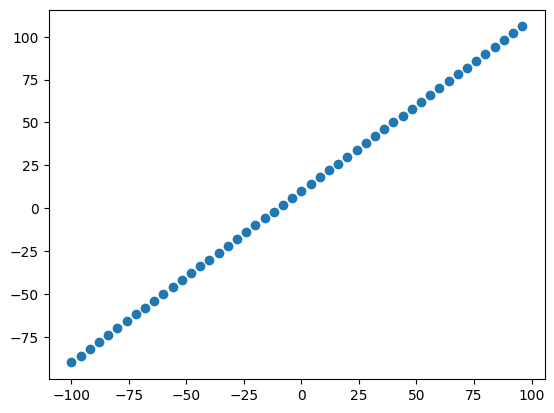

In [23]:
# Visualize the data
plt.scatter(X,y)

#### The three sets...

* Training set - the models learns from this data, which is typlically 70-80% of the data available.
* Validation set - the model gets tuned on this data, which is typpically 10-15% of the data.
* Test set - the model gets evaluated on this data to test what is has learned, this set is typlically 10-15% of the total of the data.

Generalization - The ability for a machine learning model to perform well on data it hasn't seen before.

In [24]:
# Check the length of the samples we have
len(X)

50

In [25]:
# Split into training and test (this data is too small for validation)
X_train = X[:40] # The first 40 are trainig samples (80% of the data)
y_train = y[:40]

X_test = X[40:] # the last 10 are testing samples (20% of the data)
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

#### Visualizing the data

Now we've got our data in training and test sets... let's visualize it again

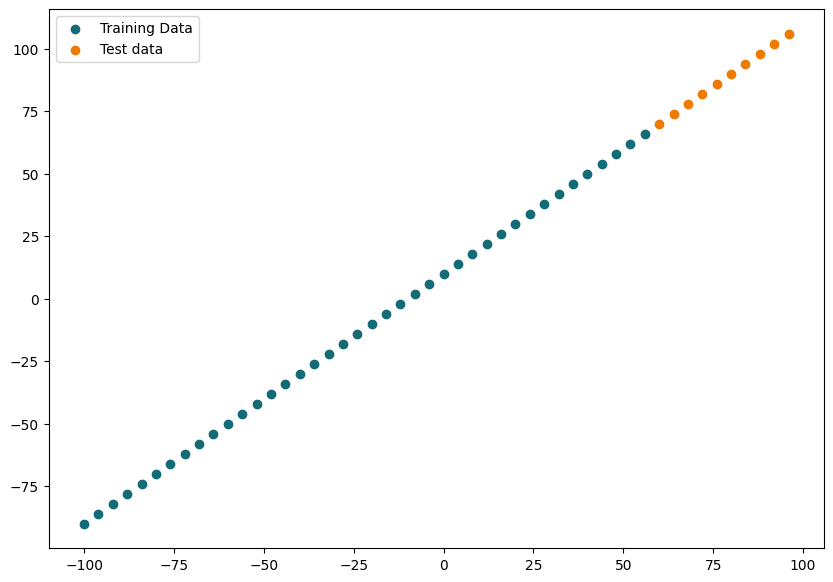

In [26]:
plt.figure(figsize=(10,7))
# Plot training data in blue
plt.scatter(X_train, y_train, c='#126b75', label='Training Data')
# Plot test data in green
plt.scatter(X_test, y_test, c='#EE7A01', label='Test data')
# Show a legend
plt.legend()

In [27]:
# Let´s have a look up at how to build a neural network for our data

# 1. Create model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# # 3. Fit the model
# model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

#### Visualizing the model

In [28]:
# Let's create a model which builds automatically by defining the imput_shape argument in the first layer
tf.random.set_seed(42)

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name='input_layer'),
    tf.keras.layers.Dense(1, name='output_layer')
], name="model_1")

# Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

In [29]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model.
* Trainable params - these are the patterns the model can update as it trains
* Non-trainable - these parameters aren't updated during training (this is typical when you brought parameters from other models during **transfer learning**)

👁️ **Resource:** Fore a more in-depth overview check:

https://www.youtube.com/watch?v=QDX-1M5Nj7s&list=PLtBw6njQRU-rwp5__7C0oIVt26ZgjG9NI&index=2

MIT - Introduction to Deep Learning
http://introtodeeplearning.com/

⚒️ **Exercise** Try playing around with the number of hidden units in the dense layer, see how that effects the number of parameters (total and trainable) by calling `model.summary()`.

In [30]:
# Let`s fit our model to the training data
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

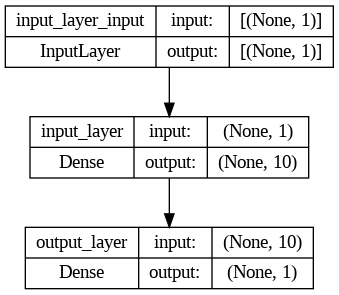

In [31]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

#### Visualizing our model's predictions

To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often you'll see this in the form of `y_test` or `y_true` versus `y_pred` (ground truth versus your model`s predictions).

In [32]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 62ms/step


array([[ 90.930504],
       [ 96.86934 ],
       [102.808174],
       [108.74701 ],
       [114.68583 ],
       [120.62467 ],
       [126.5635  ],
       [132.50233 ],
       [138.44118 ],
       [144.38    ]], dtype=float32)

In [33]:
# Remember X_test values
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

👁️ **Note:** If you feel like you`re going to reuse some kind of functionality in the future is a good idea to turn it into a function

In [34]:
# Let's create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plots training data, test data and compares predictions to ground truth labels.
  """
  plt.figure(figsize=(10,7))
  # Plot training data in one color
  plt.scatter(train_data, train_labels, c='#126b75', label='Training Data')
  # Plot test data in another color
  plt.scatter(test_data, test_labels, c='#EE7A01', label='Test data')
  # Plot model's predictions in the other color
  plt.scatter(test_data, predictions, c='#94192a', label='Predictions')
  # Show a legend
  plt.legend();




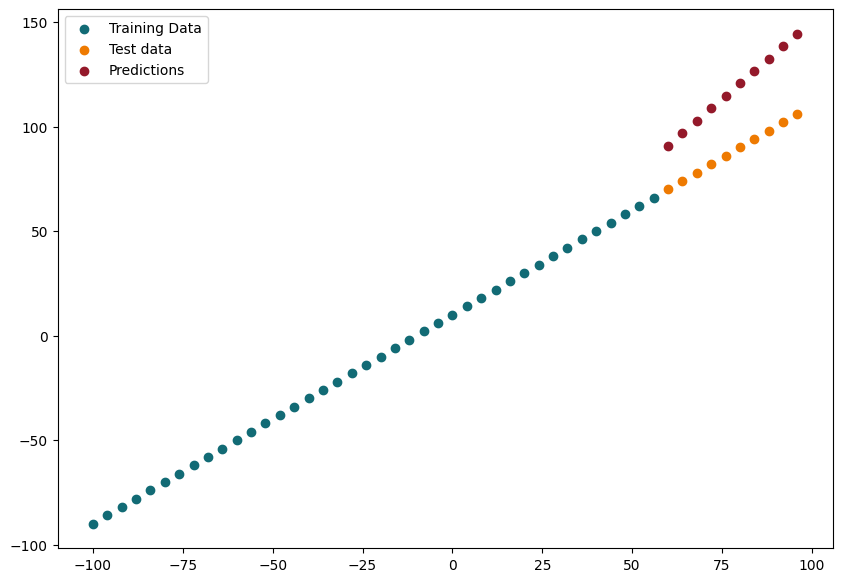

In [35]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                test_labels=y_test,
                predictions=y_pred)

#### Evaluating our model's predictions with regression evaluation metrics

Depending on the problem you are working on, there will be different evalutaion metrics to evaluate your model's performance.

Working in a Regression, two of the main metrics are:
* MAE - mean absolute error, "on average, how worng is each of my model's predictions".
* MSE - mean square error, "square the average errors"

In [36]:
# Evaluate the model on the test
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 394ms/step - loss: 29.6553 - mae: 29.6553


[29.655261993408203, 29.655261993408203]

In [44]:
tf.constant(tf.squeeze(y_pred))


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 90.930504,  96.86934 , 102.808174, 108.74701 , 114.68583 ,
       120.62467 , 126.5635  , 132.50233 , 138.44118 , 144.38    ],
      dtype=float32)>

In [42]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [45]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=tf.constant(tf.squeeze(y_pred)))
mae


<tf.Tensor: shape=(), dtype=float32, numpy=29.655254>

👁️ If we are trying to compare Tensors we need to make shapes and dtypes equal to each other:

That's why we use:
`y_pred=tf.constant(tf.squeeze(y_pred))`

In [47]:
# Calculate the mean square error
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                   y_pred=tf.constant(tf.squeeze(y_pred)))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=910.4465>

In [48]:
# Make functions to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true,
                                        y_pred=y_pred)

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true,
                                       y_pred=y_pred)

In [52]:
mse(y_test, tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=910.4465>

### Setting up TensorFlow modelling experiments